# 3.5.6

## Generate Data

One normally distributed dataset and one uniformly distributed.

In [4]:
import random
from scipy.stats import norm

In [5]:
def generate_uniform_data(seed=42196, size=10000, min_val=0, max_val=10000):
    random.seed(seed)
    return [int((random.random() * (max_val - min_val)) + min_val) for _ in range(size)]

In [6]:
def generate_normal_data(seed=42196, size=10000, mean=5000, std_dev=1000):
    random.seed(seed)
    return [int(mean + norm.ppf(random.random()) * std_dev) for _ in range(size)]

In [7]:
uniform_data = generate_uniform_data()
normal_data = generate_normal_data()

## Compute Means

In [8]:
def compute_mean(data):
    return sum(data) / len(data)

In [9]:
uniform_mean = compute_mean(uniform_data)
normal_mean = compute_mean(normal_data)

print (f"Uniform mean: {uniform_mean:.2f}")
print (f"Normal mean: {normal_mean:.2f}")

Uniform mean: 4993.32
Normal mean: 4998.26


## Show Distributions

In [26]:
def compute_histogram(data, bucket_size=100, min_val=None, max_val=None):
    if min_val is None:
        min_val = min(data)
    if max_val is None:
        max_val = max(data)
        
    # buckets labeled by min val
    num_buckets = (max_val - min_val) // bucket_size
    buckets = [min_val + i * bucket_size for i in range(num_buckets)]
    
    counts = []
    for _ in range(num_buckets):
        counts.append(0)
    for entry in data:
        counts[(entry - min_val) // bucket_size] += 1
    
    return (buckets, counts)

In [27]:
uniform_histogram = compute_histogram(uniform_data, min_val=0, max_val=10000)
normal_histogram = compute_histogram(normal_data, min_val=0, max_val=10000)

### Plot

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

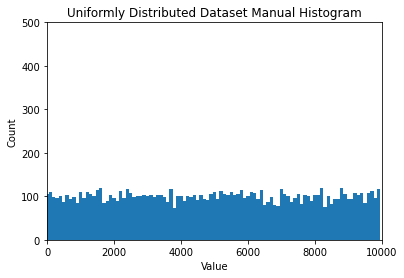

In [32]:
# uniform 
plt.bar(uniform_histogram[0], uniform_histogram[1], width=100)
plt.title('Uniformly Distributed Dataset Manual Histogram')  
plt.xlabel('Value')
plt.ylabel('Count')
plt.xlim(0, 10000)
plt.ylim(0, 500)
plt.show()

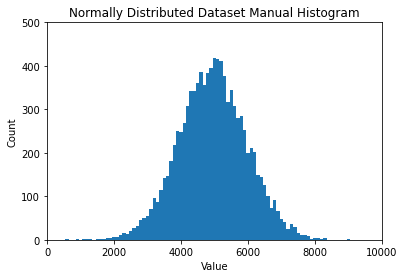

In [33]:
# normal 
plt.bar(normal_histogram[0], normal_histogram[1], width=100)
plt.title('Normally Distributed Dataset Manual Histogram')  
plt.xlabel('Value')
plt.ylabel('Count')
plt.xlim(0, 10000)
plt.ylim(0, 500)
plt.show()